In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['heart.csv']


In [2]:
df = pd.read_csv('../input/heart.csv')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


0.4492753623188406 0.75


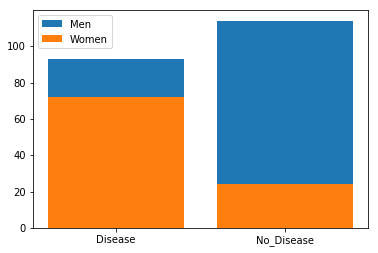

In [3]:
from matplotlib import pyplot as plt
male_true, male_false = 0, 0
female_true, female_false = 0, 0
for i in range(len(df)):
    if df['sex'][i] == 1:
        if df['target'][i]== 1:
            male_true += 1
        else:
            male_false += 1
    else:
        if df['target'][i] == 1:
            female_true += 1
        else:
            female_false += 1
print(male_true/(male_true+male_false), female_true/(female_true+female_false))
b1 = plt.bar(['Disease', 'No_Disease'], [male_true, male_false])
b2 = plt.bar(['Disease', 'No_Disease'], [female_true, female_false])
plt.legend((b1[0], b2[0]), ('Men', 'Women'))
plt.show()

77 29


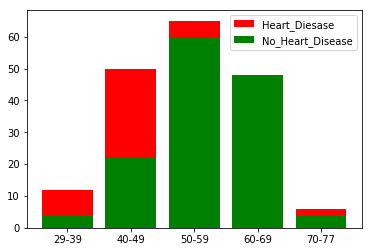

In [4]:
print(max(df['age']), min(df['age']))
a = [0]*(5)
b = [0]*5
for i in range(len(df)):
    if df['target'][i]==1:
        if df['age'][i] == 29:
            a[0] += 1
        else:
            a[df['age'][i]//10-3] += 1
    else:
        if df['age'][i] == 29:
            b[0] += 1
        else:
            b[df['age'][i]//10-3] += 1
p1 = plt.bar(['29-39', '40-49', '50-59', '60-69', '70-77'], a, color='red')#IF HEART DISEASE 
p2 = plt.bar(['29-39', '40-49', '50-59', '60-69', '70-77'], b, color='green')#IF NO HEART DISEASE
plt.legend((p1[0], p2[0]), ('Heart_Diesase', 'No_Heart_Disease'))
plt.show()

In [5]:
from sklearn.preprocessing import normalize
X = df.iloc[:,0:13].values
y = df.iloc[::,-1].values
# X = normalize(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dtc = DecisionTreeClassifier( min_samples_split=200)
dtc.fit(X_train, y_train)
pre = dtc.predict(X_test)
print(accuracy_score(pre, y_test))


0.69


Fitting different classifier
SVM 83.0
KNN 67.0
MNB 80.0
DTC 77.0
LRC 80.0
RFC 80.0
ABC 78.0
BC 80.0
ETC 84.0


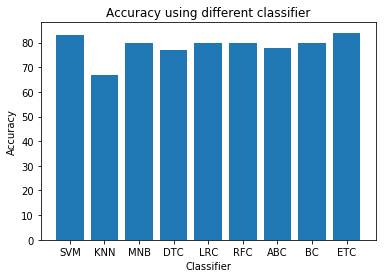

In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

svc = svm.SVC(kernel='linear')
knn = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)
abc = AdaBoostClassifier(n_estimators=100)
bc = BaggingClassifier(n_estimators=50)
etc = ExtraTreesClassifier(n_estimators=100, random_state=111)

print('Fitting different classifier')
classifier = [svc, knn, mnb, dtc, lrc, rfc, abc, bc, etc]
classifier_names = ['SVM', 'KNN', 'MNB', 'DTC', 'LRC', 'RFC', 'ABC', 'BC', 'ETC']
for i in classifier:
    i.fit(X_train, y_train)

# Predicting the Test set results
acc = 0
y_pred = []
accuracy = []
for i in range(len(classifier)):
    y_pred.append(classifier[i].predict(X_test))
for y_pre in y_pred:
    acc = 0
    for i in range(len(y_pre)):
        if y_pre[i] == y_test[i]:
            acc += 1
    accuracy.append(100*(acc/len(y_pre)))
for i in range(len(accuracy)):
    print(classifier_names[i], accuracy[i])
import matplotlib.pyplot as plt
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy using different classifier')
plt.bar(classifier_names, accuracy)
plt.show()